In [ ]:
!pip install celluloid
#!pip install numdifftools

## Loading libraries

In [ ]:
import numpy as np

from celluloid import Camera

import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from time import time

from IPython.display import HTML

In [ ]:
plt.style.use('seaborn-white')

# Analysing how variants of gradient descent converges

In [ ]:
parameters = np.array([5, 4])
X = 3*np.random.rand(300, 1)
Y = parameters[0] + parameters[1]*X + np.random.randn(300, 1)

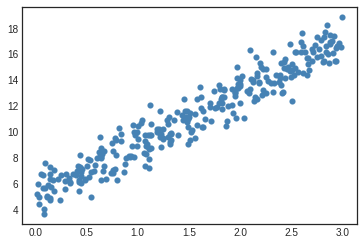

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, linewidths=.1, color="steelblue")

In [ ]:
param1_space = np.linspace(0, 10, 100)
param2_space = np.linspace(0, 10, 100)

In [ ]:
[param1, param2] = np.meshgrid(param1_space, param2_space)

In [ ]:
# function to predict linear regression output
Prediction = lambda a, b, x: a+b*x

In [ ]:
# function to calculate mean-squared loss
def loss(p1, p2):
  SquaredLoss = np.dot((Y-p1-p2*X).T, (Y-p1-p2*X))[0][0]
  m = X.shape[0] 
  return SquaredLoss/m

In [ ]:
# Calculating loss for the mess-grid.
Z = np.vectorize(loss)(param1, param2)

In [ ]:
def contourPlot(ax, p1, p2, Z):
  #ax = plt.gca()

  contourLines = ax.contour(param1_space, param2_space, Z, 50, colors='white', linewidths=.2, levels=[0, 2, 5, 10, 20, 40, 80, 160, 240]) # Create contour lines
  ax.clabel(contourLines, inline=1, fontsize=14, fmt='%1.f') # Tag labels to the contour lines
  ax.contourf(param1_space, param2_space, Z, 50, cmap='viridis', levels=[0, 2, 5, 10, 20, 40, 80, 160, 240]) # Create filled contour plot

  ax.set_xlabel('param1', fontsize=12)
  ax.set_ylabel('param2', fontsize=12)



In [ ]:
def convergencePath(ax, prev_x1, prev_x2, x1, x2):
  #ax = plt.gca()
  
  ax.scatter(x1, x2, color='white', marker='o', linewidth=2, zorder = 10)
  ax.scatter(prev_x1, prev_x2, edgecolor='white', facecolor='none', marker='o', linewidth=.5, zorder = 10)
  ax.plot([prev_x1, x1], [prev_x2, x2], color="white", linewidth=2, linestyle='dashed')

  ax.scatter([5], [4], color='white', s=100, marker='+') # True value

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.title.set_text('Batch Gradient Descent')
ax2.title.set_text('Mini-Batch Gradient Descent')
ax3.title.set_text('Stochastic Gradient Descent')

camera = Camera(fig)

x11 = x21 = x31 = 1
x12 = x22 = x32 = 1

index = 0

t=.1 #learning rate

for i in range(30):
  # first subplot: Batch Gradient Descent
  prev_x11 = x11
  prev_x12 = x12

  x11 = prev_x11 - t*(2/len(X))*np.sum((Prediction(prev_x11, prev_x12, X) - Y))
  x12 = prev_x12 - t*(2/len(X))*np.sum((Prediction(prev_x11, prev_x12, X) - Y)*X)

  contourPlot(ax1, param1_space, param2_space, Z)
  convergencePath(ax1, prev_x11, prev_x12, x11, x12)

  # second subplot: Mini-Batch Gradient Descent
  prev_x21 = x21
  prev_x22 = x22

  x21 = prev_x21 - t*(2/10)*np.sum((Prediction(prev_x21, prev_x22, X[index:index+9]) - Y[index:index+9]))
  x22 = prev_x22 - t*(2/10)*np.sum((Prediction(prev_x21, prev_x22, X[index:index+9]) - Y[index:index+9])*X[index:index+9])

  contourPlot(ax2, param1_space, param2_space, Z)
  convergencePath(ax2, prev_x21, prev_x22, x21, x22)

  # third subplot: Stochastic Gradient Descent
  prev_x31 = x31
  prev_x32 = x32

  x31 = prev_x31 - t*2*np.sum((Prediction(prev_x31, prev_x32, X[i]) - Y[i]))
  x32 = prev_x32 - t*2*np.sum((Prediction(prev_x31, prev_x32, X[i]) - Y[i])*X[i])

  contourPlot(ax3, param1_space, param2_space, Z)
  convergencePath(ax3, prev_x31, prev_x32, x31, x32)
  
  camera.snap()
  index = index + 10

plt.close('all')

animation = camera.animate(interval=400)
HTML(animation.to_html5_video())
#HTML(animation.to_jshtml())

# Regression plot for different gradient descent algorithms

In [ ]:
k = np.linspace(0, 3, 1000)

In [ ]:

def regressionPlot(ax, prev_x1, prev_x2, x1, x2):
  ax.set_ylim([0, 22])
  ax.set_xlabel("X")
  ax.set_ylabel("Y")

  ax.scatter(X, Y, color="lightseagreen", s=20)
  ax.plot(k,  Prediction(x1, x2, k), color="crimson", linewidth=4, zorder=10)
  ax.plot(k,  Prediction(prev_x1, prev_x2, k), color="crimson", linewidth=2, linestyle='dashed', zorder=9)
  ax.text(0.1, 16, 'loss = {:.2f}'.format(loss(x1, x2)), fontsize=14)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.title.set_text('Batch Gradient Descent')
ax2.title.set_text('Mini-Batch Gradient Descent')
ax3.title.set_text('Stochastic Gradient Descent')

camera = Camera(fig)

x11 = x21 = x31 = 1
x12 = x22 = x32 = 1

index = 0

t=.1 #learning rate

for i in range(30):
  # first subplot: Batch Gradient Descent
  prev_x11 = x11
  prev_x12 = x12

  x11 = prev_x11 - t*(2/len(X))*np.sum((Prediction(prev_x11, prev_x12, X) - Y))
  x12 = prev_x12 - t*(2/len(X))*np.sum((Prediction(prev_x11, prev_x12, X) - Y)*X)

  regressionPlot(ax1, prev_x11, prev_x12, x11, x12)

  # second subplot: Mini-Batch Gradient Descent
  prev_x21 = x21
  prev_x22 = x22

  x21 = prev_x21 - t*(2/10)*np.sum((Prediction(prev_x21, prev_x22, X[index:index+9]) - Y[index:index+9]))
  x22 = prev_x22 - t*(2/10)*np.sum((Prediction(prev_x21, prev_x22, X[index:index+9]) - Y[index:index+9])*X[index:index+9])

  regressionPlot(ax2, prev_x21, prev_x22, x21, x22)

  # third subplot: Stochastic Gradient Descent
  prev_x31 = x31
  prev_x32 = x32

  x31 = prev_x31 - t*2*np.sum((Prediction(prev_x31, prev_x32, X[i]) - Y[i]))
  x32 = prev_x32 - t*2*np.sum((Prediction(prev_x31, prev_x32, X[i]) - Y[i])*X[i])

  regressionPlot(ax3, prev_x31, prev_x32, x31, x32)
  
  camera.snap()
  index = index + 10

plt.close('all')

animation = camera.animate(interval=400)
HTML(animation.to_html5_video())
#HTML(animation.to_jshtml())

# Comparing convergence for a multiclass-classification problem

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#train_images = train_images[np.logical_or(train_labels == 0, train_labels == 1)]
#train_labels = train_labels[np.logical_or(train_labels == 0, train_labels == 1)]

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [ ]:
inputs = keras.Input(shape=(784, ))
x1 = layers.Dense(64, activation="relu")(inputs)
# x2 = layers.Dense(32, activation="relu")(x1)
outputs = layers.Dense(10)(x1) # (x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.save_weights('initialWeights.h5')

In [ ]:
def trainingSetup(train_images, train_labels, batchSize, learningRate):
  # Instantiate an optimizer.
  optimizer = keras.optimizers.SGD(learning_rate= learningRate, momentum=0, nesterov=False) # 1e-1

  # Instantiate a loss function.
  loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  # Prepare the training dataset.
  batch_size = batchSize #len(train_labels)

  x_train = np.reshape(train_images, (-1, 784))
  y_train = train_labels

  # Prepare the training dataset.
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  train_dataset = train_dataset.shuffle(buffer_size=len(train_labels)).batch(batch_size)

  return [optimizer, loss_fn, train_dataset, x_train, y_train]

In [ ]:
def trainModel(model, EPOCHS, trainingData, x_train, y_train, loss_fn, optimizer, index, loss, timer):
  
  i = 1
  
  index.append(0)
  loss.append(loss_fn(y_train, model(x_train, training=False)))
  timer.append(0)

  for epoch in range(EPOCHS):
      # print("\nStart of epoch %d" % (epoch,))

      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(trainingData):

          t0 = time()
          # Open a GradientTape to record the operations run
          # during the forward pass, which enables auto-differentiation.
          with tf.GradientTape() as tape:
              logits = model(x_batch_train, training=True)  # Logits for this minibatch

              # Compute the loss value for this minibatch.
              loss_value = loss_fn(y_batch_train, logits)
              

          grads = tape.gradient(loss_value, model.trainable_weights)
          #grad.append(grads)

          optimizer.apply_gradients(zip(grads, model.trainable_weights))
          
          timer.append(timer[i-1] + (time() - t0))    
          # Append complete loss
          loss.append(loss_fn(y_train, model(x_train, training=False)))
          
          # Update index
          index.append(i)
          i = i + 1

          # Print after every batch update
          '''
          if True:
              print(
                  "Training loss (for one batch) at step %d: %.4f"
                  % (step, float(loss_value))
              )
              print("Seen so far: %s samples" % ((step + 1) * batch_size))
          '''

### Batch Gradient Descent

Batch Gradient Descent

In [ ]:
index = []
loss = []
timer = []

In [ ]:
model.load_weights('initialWeights.h5')

In [ ]:
[optimizer, loss_fn, training_dataset, x_train, y_train] = trainingSetup(train_images, train_labels, len(train_labels), learningRate = 2*1e-1)
trainModel(model, 1000, training_dataset, x_train, y_train , loss_fn, optimizer, index, loss, timer)

Stochastic Gradient Descent

In [ ]:
index1 = []
loss1 = []
timer1 = []

In [ ]:
model.load_weights('initialWeights.h5')

In [ ]:
[optimizer, loss_fn, training_dataset, x1_train, y1_train] = trainingSetup(train_images[:2000], train_labels[:2000], 1, learningRate = 1e-2)
trainModel(model, 1, training_dataset, x_train, y_train, loss_fn, optimizer, index1, loss1, timer1)

Mini-Batch Gradient Descent

batchSize = 100

In [ ]:
index2 = []
loss2 = []
timer2 = []

In [ ]:
model.load_weights('initialWeights.h5')

In [ ]:
[optimizer, loss_fn, training_dataset, x_train, y_train] = trainingSetup(train_images, train_labels, 100, learningRate = 1e-2)
trainModel(model, 3, training_dataset, x_train, y_train , loss_fn, optimizer, index2, loss2, timer2)

batchSize = 50

In [ ]:
index3 = []
loss3 = []

In [ ]:
model.load_weights('initialWeights.h5')

In [ ]:
[optimizer, loss_fn, training_dataset] = trainingSetup(train_images, train_labels, 50, learningRate = 1e-2)
trainModel(model, 5, training_dataset, loss_fn, optimizer, index3, loss3)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

iter_till = 500
ax1.plot(index[:iter_till], loss[:iter_till], label='GD', linewidth=2)
ax1.plot(index1[:iter_till], loss1[:iter_till], label='SGD', linewidth=2)
ax1.plot(index2[:iter_till], loss2[:iter_till], label='M-BGD (batchSize = 100)', linewidth=2)
#plt.plot(index3[:1000], loss3[:1000], linestyle='dotted', label='M-BGD (batchSize = 100)')
ax1.set_xlabel("Iterations", fontsize = 14)
ax1.set_ylabel("Loss over complete training data", fontsize = 14)
ax1.legend(fontsize=14)

time_till = 9
ax2.plot(timer[:len([idx for idx, element in enumerate(timer) if element < time_till])], 
         loss[:len([idx for idx, element in enumerate(timer) if element < time_till])], label='GD', linewidth=2)
ax2.plot(timer1[:len([idx for idx, element in enumerate(timer1) if element < time_till])], 
         loss1[:len([idx for idx, element in enumerate(timer1) if element < time_till])], label='SGD', linewidth=2)
ax2.plot(timer2[:len([idx for idx, element in enumerate(timer2) if element < time_till])], 
         loss2[:len([idx for idx, element in enumerate(timer2) if element < time_till])], label='M-BGD (batchSize = 100)', linewidth=2)
#plt.plot(index3[:1000], loss3[:1000], linestyle='dotted', label='M-BGD (batchSize = 100)')
ax2.text(4.5, 2, "In GD, time consumed(in sec) per iterations: {:.4f}".format(9/24), fontsize=14)
ax2.text(4.5, 1.9, "In SGD, time consumed(in sec) per iterations: {:.4f}".format(9/1836), fontsize=14)
ax2.text(4.5, 1.8, "In M-BGD, time consumed(in sec) per iterations: {:.4f}".format(9/1441), fontsize=14)

ax2.set_xlabel("Time", fontsize = 14)
ax2.set_ylabel("Loss over complete training data", fontsize = 14)
ax2.legend(fontsize=14)

plt.show()